In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Notebook 5: Prediction Models
In this Notebook, we do predicitons on internal, external, and mixed features.

<h1>Import Data

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
movies=pd.read_csv('Models_data/movies.csv')
movies.shape

(7723, 20)

<h3>Change the columns 

<li>We change date string to datetime object, and then adjust gross using PPI at the release date of movies;
<li>All movies are sorted by release date in increasing order.

In [274]:
movies['release date']=movies['release date'].apply(lambda x: pd.to_datetime(x))

In [275]:
movies=movies.sort_values(by='release date',ascending=True)
movies.head()

,Unnamed: 0,title,imdb id,runtime,genre,rate,rating count,country,language,release date,budget,gross usa,cumulative worldwide gross,director,writer,cast,production company,budget_PPI,gross_usa_PPI,cumulative_worldwide_gross_PPI
462,462,The Best Years of Our Lives,tt0036868,170,"['Drama', 'Romance', 'War']",8.0,54247.0,['USA'],['English'],1947-05-29,2100000.0,23650000.0,23656620.0,['nm0943758'],"['nm0792845', 'nm0437969']","['nm0001485', 'nm0545298', 'nm0000763', 'nm094...",['co0016710'],0.125945,0.125945,0.125945
463,463,Duel in the Sun,tt0038499,129,"['Drama', 'Romance', 'Western']",6.8,7572.0,['USA'],['English'],1947-09-12,8000000.0,20408163.0,20428771.0,"['nm0896542', 'nm0112897', 'nm0226189', 'nm029...","['nm0006388', 'nm0124002', 'nm0308177', 'nm037...","['nm0428354', 'nm0001072', 'nm0000060', 'nm000...","['co0130901', 'co0005025']",0.132997,0.132997,0.132997
2168,2168,Monsieur Verdoux,tt0039631,124,"['Comedy', 'Crime', 'Drama']",7.9,14502.0,['USA'],['English'],1947-12-08,2000000.0,64636.0,64636.0,['nm0000122'],"['nm0000122', 'nm0000080']","['nm0000122', 'nm0180900', 'nm0734467', 'nm050...",['co0028083'],0.139547,0.139547,0.139547
7722,7722,The Treasure of the Sierra Madre,tt0040897,126,"['Adventure', 'Drama', 'Western']",8.2,106113.0,"['USA', 'Mexico']","['English', 'Spanish']",1948-01-24,3000000.0,215295.0,215295.0,['nm0001379'],"['nm0001379', 'nm0871252']","['nm0000007', 'nm0404158', 'nm0392529', 'nm007...",['co0002663'],0.137028,0.137028,0.137028
7158,7158,Bicycle Thieves,tt0040522,89,['Drama'],8.3,132278.0,['Italy'],"['Italian', 'English']",1949-12-13,133000.0,371111.0,428978.0,['nm0001120'],"['nm0953790', 'nm0059030', 'nm0080755', 'nm014...","['nm0536009', 'nm0821543', 'nm0136794', 'nm002...","['co0534951', 'co0072996']",0.130479,0.130479,0.130479


In [276]:
movies['budget_adjusted']=movies['budget']/movies['budget_PPI']
movies['gross_usa_adjusted']=movies['gross usa']/movies['gross_usa_PPI']
movies['cumulative_worldwide_gross_adjusted']=movies['cumulative worldwide gross']/movies['cumulative_worldwide_gross_PPI']
movies.head()

,Unnamed: 0,title,imdb id,runtime,genre,rate,rating count,country,language,release date,...,director,writer,cast,production company,budget_PPI,gross_usa_PPI,cumulative_worldwide_gross_PPI,budget_adjusted,gross_usa_adjusted,cumulative_worldwide_gross_adjusted
462,462,The Best Years of Our Lives,tt0036868,170,"['Drama', 'Romance', 'War']",8.0,54247.0,['USA'],['English'],1947-05-29,...,['nm0943758'],"['nm0792845', 'nm0437969']","['nm0001485', 'nm0545298', 'nm0000763', 'nm094...",['co0016710'],0.125945,0.125945,0.125945,1.667400e+07,1.877810e+08,1.878336e+08
463,463,Duel in the Sun,tt0038499,129,"['Drama', 'Romance', 'Western']",6.8,7572.0,['USA'],['English'],1947-09-12,...,"['nm0896542', 'nm0112897', 'nm0226189', 'nm029...","['nm0006388', 'nm0124002', 'nm0308177', 'nm037...","['nm0428354', 'nm0001072', 'nm0000060', 'nm000...","['co0130901', 'co0005025']",0.132997,0.132997,0.132997,6.015152e+07,1.534477e+08,1.536027e+08
2168,2168,Monsieur Verdoux,tt0039631,124,"['Comedy', 'Crime', 'Drama']",7.9,14502.0,['USA'],['English'],1947-12-08,...,['nm0000122'],"['nm0000122', 'nm0000080']","['nm0000122', 'nm0180900', 'nm0734467', 'nm050...",['co0028083'],0.139547,0.139547,0.139547,1.433213e+07,4.631858e+05,4.631858e+05
7722,7722,The Treasure of the Sierra Madre,tt0040897,126,"['Adventure', 'Drama', 'Western']",8.2,106113.0,"['USA', 'Mexico']","['English', 'Spanish']",1948-01-24,...,['nm0001379'],"['nm0001379', 'nm0871252']","['nm0000007', 'nm0404158', 'nm0392529', 'nm007...",['co0002663'],0.137028,0.137028,0.137028,2.189338e+07,1.571179e+06,1.571179e+06
7158,7158,Bicycle Thieves,tt0040522,89,['Drama'],8.3,132278.0,['Italy'],"['Italian', 'English']",1949-12-13,...,['nm0001120'],"['nm0953790', 'nm0059030', 'nm0080755', 'nm014...","['nm0536009', 'nm0821543', 'nm0136794', 'nm002...","['co0534951', 'co0072996']",0.130479,0.130479,0.130479,1.019324e+06,2.844229e+06,3.287727e+06


<h3>Quantify Country Attribute</h3>
<li> One-hot encoding transformation is used. We split this attribute into three attributes: USA, UK and other_countries.

In [277]:
print(movies.shape)
countries=np.array(movies['country'])
c_list=list()
for i in countries:
    c_dict={'USA':0,'UK':0,'other_countries':0}
    if 'USA' in i:
        c_dict['USA']=1
    elif 'UK' in i:
        c_dict['UK']=1
    else:
        c_dict['other_countries']=1
    c_list.append(c_dict)
print(len(c_list))
c_df=pd.DataFrame(c_list)
movies=movies.join(c_df)

(7723, 23)
7723


<h3>Classify gross attributes</h3>
<li> we calculate the 0%, 33.33%, 66.67%, 100% quantile, and divided all movies into three group: low (0 - 33.33%), medium (33.33 – 66.67%) and high (66.67 – 100%), which are represented by 1, 2, 3 respectively and stored as variable gross_usa_adjusted_level .

In [278]:
def gross_level(gross):
    df=np.array(gross)
    pc=list()
    for i in [0,100/3,200/3,100]:
        x=np.percentile(df,i)
        pc.append(x)
    level_list=list()
    for i in df:
        for j in range(len(pc)):
            if j<len(pc)-2:
                if i>=pc[j] and i<pc[j+1]:
                    level_list.append(j+1)
            elif j==len(pc)-2:
                if i>=pc[j] and i<=pc[j+1]:
                    level_list.append(j+1)
            else:
                continue
#     print(len(level_list))
    level_df=pd.DataFrame(level_list) 
    return level_df  
movies['gross_usa_adjusted_level']=gross_level(movies['gross_usa_adjusted'])
movies['cumulative_worldwide_gross_adjusted_level']=gross_level(movies['cumulative_worldwide_gross_adjusted'])

<h3> Quantify genre attribute</h3>
<li> One-hot encoding transforms genre attribute to 21 binary attributes. All values are 0 except for 1.

In [279]:
def genre(df):
    genre_set=set()
    for i in df:
        for j in eval(i):
            genre_set.add(j)
    genre_set=list(genre_set)

    genre_list=list()
    for i in df:
        genre_dict=dict()
        for j in genre_set:
            if j in eval(i):
                genre_dict[j]=1
            else:
                genre_dict[j]=0
        genre_list.append(genre_dict)
    genre_df=pd.DataFrame(genre_list)
    return genre_df

In [280]:
df=movies['genre']
genres=genre(df)
movies_1=movies.join(genres)
del movies_1['genre']
movies_1.head()

,Unnamed: 0,title,imdb id,runtime,rate,rating count,country,language,release date,budget,...,Film-Noir,Animation,Action,War,Adventure,Romance,Musical,Biography,History,Western
462,462,The Best Years of Our Lives,tt0036868,170,8.0,54247.0,['USA'],['English'],1947-05-29,2100000.0,...,0,0,0,0,0,0,0,0,0,0
463,463,Duel in the Sun,tt0038499,129,6.8,7572.0,['USA'],['English'],1947-09-12,8000000.0,...,0,0,1,0,0,0,0,0,0,0
2168,2168,Monsieur Verdoux,tt0039631,124,7.9,14502.0,['USA'],['English'],1947-12-08,2000000.0,...,0,0,0,0,0,0,0,1,0,0
7722,7722,The Treasure of the Sierra Madre,tt0040897,126,8.2,106113.0,"['USA', 'Mexico']","['English', 'Spanish']",1948-01-24,3000000.0,...,0,1,0,0,1,0,0,0,0,0
7158,7158,Bicycle Thieves,tt0040522,89,8.3,132278.0,['Italy'],"['Italian', 'English']",1949-12-13,133000.0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
movies=movies_1
del movies['Unnamed: 0']

### Quantify people and company attributes
  - To judge a person\company, his past achievement is the most important factor that should be considered. We judge this from two sides:
    - The number of previous works of a person/companies are also calculated to measure how experienced he is in making movies.
    - Business Value: We first score movies (highest-revenue movie gets 100 points, lowest-revenue movie gets 0 points, and other movies are linearly distributed between 0 and 100). Then, for each person/company of each movie, we calculate the average score of all the movies he participated in before this movie as his score at that moment.Finally, we calculate the sum of the scores of all people/companies in a movie.

In [282]:
def count(df):
    e_dict=dict()
    for i in df:
        for j in eval(i):
            if j in e_dict.keys():
                e_dict[j]+=1
            else:
                e_dict[j]=1
    frequency=list()
    for i in df:
        freq=0
        for j in eval(i):
            freq+=e_dict[j]
        frequency.append(freq)
    frequency=pd.DataFrame(frequency)    
    return frequency

In [283]:
count_list=['language','director','writer','cast','production company']
for i in count_list:
    df=movies[i]
    counts=count(df)
    name=i+'_count'
    movies[name]=counts

In [284]:
movies['gross_usa_score']=np.log(movies['gross_usa_adjusted'])/np.log(max(movies['gross_usa_adjusted']))*100
movies['cumulative_worldwide_gross_score']=np.log(movies['cumulative_worldwide_gross_adjusted'])/np.log(max(movies['cumulative_worldwide_gross_adjusted']))*100

In [285]:
for x in [ 'director', 'writer', 'cast','production company']:
    row=0
    usa_score_list=[]
    worldwide_score_list=[]
    dictionary=dict()

    for i in range(movies.shape[0]):
        for name in eval(movies[x].iloc[i]):
            if name not in dictionary.keys():
                dictionary[name]=[]
            dictionary[name].append(i)
        column=x+'_score'
    #     print(dictionary)

        usa_score=0
        worldwide_score=0

        for j in eval(movies[x].iloc[i]):
            usa_total_score=0
            worldwide_total_score=0
    #         print(dictionary[j])
            for k in dictionary[j]:
                usa_total_score+=movies['gross_usa_score'].iloc[k]
                worldwide_total_score+=movies['cumulative_worldwide_gross_score'].iloc[k]
            usa_score_per= usa_total_score/len(dictionary[j])
            worldwide_score_per=worldwide_total_score/len(dictionary[j])

    #         print(usa_score_per)
            usa_score+=usa_score_per
            worldwide_score+=worldwide_score_per

    #     print(usa_score)
        usa_score_list.append(usa_score)
        worldwide_score_list.append(worldwide_score)
    #     print(usa_score_list)
    column=x+'_score'
    movies[column+'_US']=np.array(usa_score_list)
    movies[column+'_worldwide']=np.array(worldwide_score_list)

### Get the release year, week of a movie

In [286]:
def year(x):
    return x.year
movies['release_year']=movies['release date'].apply(year)
movies['budget_year']=movies['budget_adjusted']/movies['release_year']

In [287]:
# movies[ 'release date'].iloc[100].isocalendar()[1]
def week_number(x):
    return x.isocalendar()[1]
movies['week_number']=movies[ 'release date'].apply(week_number)

### Identify serial movies and mark them with their serial number

In [288]:
collec=pd.read_csv('Models_data/movie_num.csv')
del collec['Unnamed: 0']
movies=pd.merge(movies,collec,how='left',on='imdb id')
movies['movie_num']=movies['movie_num'].fillna(1)

### Delete movies release before 1980 and in 2000
- Due to some technical issues, the movie data before 1980 and in 2000 is significantly lower than other times.

In [289]:
from datetime import datetime
movies['release date'].iloc[0].year
def year_test(x):
    if x.year<1980 or x.year==2000:
        return False
    else:
        return True
movies=movies[movies['release date'].apply(year_test)]
movies=movies[movies['USA']==1]
movies=movies[movies['UK']==0]
movies=movies[movies['other_countries']==0]

### Combine with external economic factors

In [290]:
e_factors=pd.read_csv('Models_data/external_factors.csv')

In [291]:
movies=pd.merge(movies,e_factors,how='left',on='imdb id')
movies.shape

(5960, 84)

In [292]:
movies=movies.dropna()
movies.shape

(5633, 84)

<h1>Regression Analysis

<li> Drop useless attributes and the attributes that are highly correlated;
<li> Select independant variables (indep)
<li> Select dependant variables.

In [188]:
all_attr=list(movies.columns)
useless=['title','imdb id','release date','rating count','rate','country','genre','budget', 'director', 'writer', 'cast', 'language',
         'gross usa', 'cumulative worldwide gross','budget_PPI', 'gross_usa_PPI','cumulative_worldwide_gross_PPI','production company',
         'gross_usa_score','cumulative_worldwide_gross_score']
dep=['gross_usa_adjusted', 'cumulative_worldwide_gross_adjusted','gross_usa_adjusted_level','cumulative_worldwide_gross_adjusted_level']
high_cor=['Gini: White Alone','China Personal Expense: Rural Households','China Personal Expense: Urban Households','China Personal Expense: All Households',
         'cast_score_worldwide','director_score_worldwide','writer_score_worldwide','US CPI: All Items (1967=100)','production company_score_worldwide',
         'release_year']
indep=[x for x in all_attr if (x not in dep and x not in useless and x not in high_cor)]
indep

['runtime',
 'budget_adjusted',
 'USA',
 'UK',
 'other_countries',
 'language_count',
 'director_count',
 'writer_count',
 'cast_count',
 'production company_count',
 'Comedy',
 'Crime',
 'Mystery',
 'Fantasy',
 'Sport',
 'Thriller',
 'Horror',
 'Drama',
 'Family',
 'Music',
 'Sci-Fi',
 'Film-Noir',
 'Animation',
 'Action',
 'War',
 'Adventure',
 'Romance',
 'Musical',
 'Biography',
 'History',
 'Western',
 'director_score_US',
 'writer_score_US',
 'cast_score_US',
 'production company_score_US',
 'budget_year',
 'week_number',
 'movie_num',
 'Unemployment_Rate',
 'US CPI: All items',
 'GDP_deflator',
 'US Real GDP 2',
 'US Real GDP 1',
 'US Real GDP: Personal Consumption Expenditures',
 'US Nominal GDP: Gross Domestic Product',
 'US Nominal GDP: Personal Consumption Expenditures',
 'House_Price_Index',
 'Gini: Gini Coefficient',
 'World CPI 2',
 'rev_ppi_log',
 'budget_ppi_log']

### Calculate the correlation coefficients between independent variables
- To get a brief idea of feature importance

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
def test(df):
    dfData = df.corr()
    dfData = abs(dfData)
    plt.subplots(figsize=(15, 15)) # 设置画面大小
    sns.heatmap(dfData, annot=False, vmax=1, square=True, cmap="Blues")
    plt.savefig('./BluesStateRelation.png')
    plt.show()


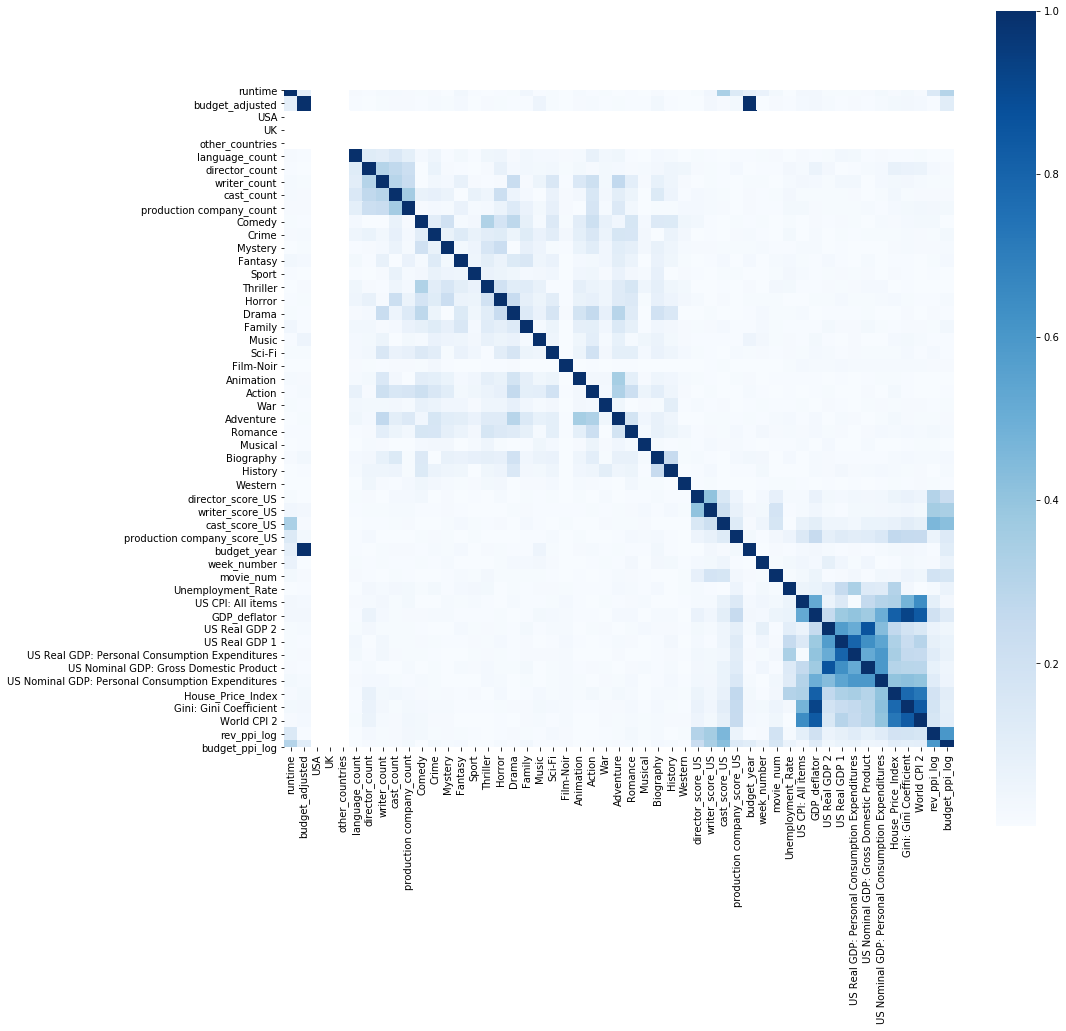

In [190]:
df=movies[indep]
test(df)

Text(0.5, 1.0, 'Corr Analysis')

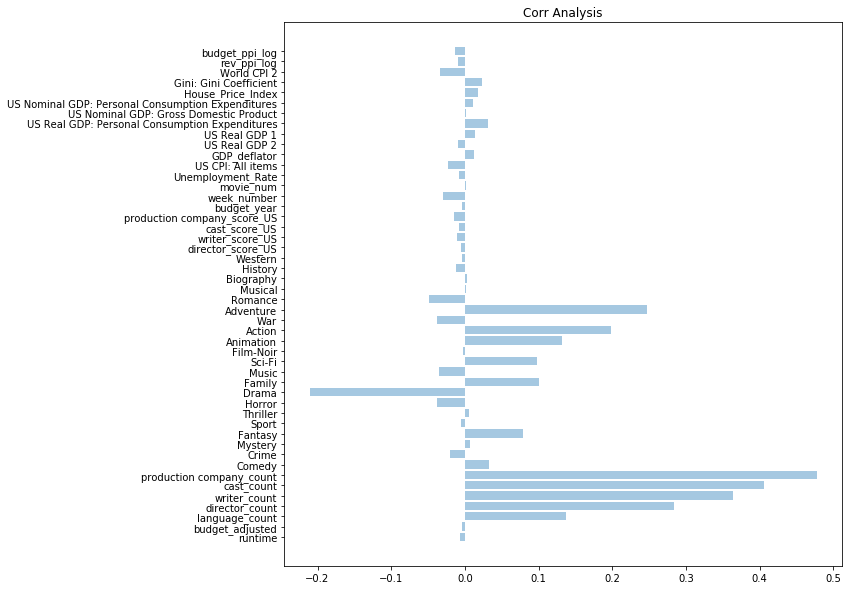

In [191]:
corr_list=[]
for i in indep:
    if i not in ['USA','UK','other_countries']:
        corr=movies[[i,'gross_usa_adjusted_level']].corr().iloc[1,0]
        corr_list.append(corr)
        
attrs=[x for x in indep if x not in ['USA','UK','other_countries']]
y_pos = np.arange(len(attrs))


plt.subplots(figsize=(10, 10)) # 设置画面大小

plt.barh(y_pos, corr_list, align='center', alpha=0.4)

plt.yticks(y_pos, attrs)
# plt.xlabel('Corr Analysis')
plt.title('Corr Analysis')
# plt.savefig("barh.eps",format="eps")

Text(0.5, 1.0, 'Corr Analysis')

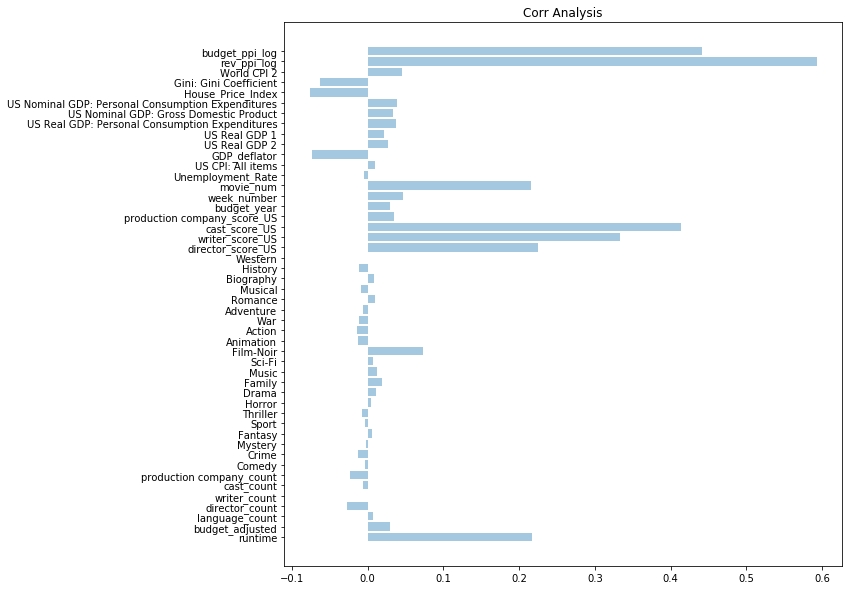

In [193]:
corr_list=[]
for i in indep:
    if i not in ['USA','UK','other_countries']:
        corr=movies[[i,'gross_usa_adjusted']].corr().iloc[1,0]
        corr_list.append(corr)
        
attrs=[x for x in indep if x not in ['USA','UK','other_countries']]
y_pos = np.arange(len(attrs))


plt.subplots(figsize=(10, 10)) # 设置画面大小

plt.barh(y_pos, corr_list, align='center', alpha=0.4)

plt.yticks(y_pos, attrs)
# plt.xlabel('Corr Analysis')
plt.title('Corr Analysis')
# plt.savefig("barh.eps",format="eps")

<h1>Train set and test set

<li> We now got 5960 movies and randomly choose 20% as our test set.

In [242]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(movies, test_size = 0.2)   #### 30% in the test set

In [243]:
x_train = train[indep]
y_train = train['gross_usa_adjusted_level']
x_test = test[indep]
y_test = test['gross_usa_adjusted_level']
################################# to see how good your model is 

In [244]:
x_train=x_train.reset_index()
del x_train['index']
x_train.describe()

,runtime,budget_adjusted,USA,UK,other_countries,language_count,director_count,writer_count,cast_count,production company_count,...,US Real GDP 2,US Real GDP 1,US Real GDP: Personal Consumption Expenditures,US Nominal GDP: Gross Domestic Product,US Nominal GDP: Personal Consumption Expenditures,House_Price_Index,Gini: Gini Coefficient,World CPI 2,rev_ppi_log,budget_ppi_log
count,4506.000000,4.506000e+03,4506.0,4506.0,4506.0,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,...,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000
mean,107.231913,5.883610e+07,1.0,0.0,0.0,7322.859743,6.321571,14.655126,394.074345,202.637150,...,1.946960,1.936307,1.933866,1.962716,1.966045,2.017088,1.933644,1.889481,1.036396,1.063915
std,18.880068,5.319096e+08,0.0,0.0,0.0,621.039504,7.010616,17.682174,268.063011,208.053071,...,1.420503,1.379791,1.412509,1.426539,1.409954,1.419985,1.387046,1.441494,0.837526,0.829478
min,63.000000,1.769688e+01,1.0,0.0,0.0,4.000000,1.000000,1.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,7.029971e+06,1.0,0.0,0.0,7138.000000,2.000000,4.000000,210.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,104.000000,2.174321e+07,1.0,0.0,0.0,7138.000000,4.000000,9.000000,335.500000,124.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
75%,116.000000,4.775461e+07,1.0,0.0,0.0,7314.000000,8.000000,19.000000,512.000000,383.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
max,272.000000,2.949480e+10,1.0,0.0,0.0,10001.000000,121.000000,226.000000,2607.000000,1109.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000


In [199]:
y_train=y_train.reset_index()
del y_train['index']
y_train.head()

,gross_usa_adjusted_level
0,2
1,2
2,1
3,2
4,3


In [200]:
x_test=x_test.reset_index()
del x_test['index']
x_test.head()

,runtime,budget_adjusted,USA,UK,other_countries,language_count,director_count,writer_count,cast_count,production company_count,...,US Real GDP 2,US Real GDP 1,US Real GDP: Personal Consumption Expenditures,US Nominal GDP: Gross Domestic Product,US Nominal GDP: Personal Consumption Expenditures,House_Price_Index,Gini: Gini Coefficient,World CPI 2,rev_ppi_log,budget_ppi_log
0,123,2.927729e+06,1,0,0,7138,1,2,233,388,...,4.0,3.0,3.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0
1,110,1.760792e+07,1,0,0,7138,2,4,367,100,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0,1.0
2,96,2.687274e+07,1,0,0,7138,11,24,306,667,...,3.0,4.0,3.0,4.0,3.0,0.0,0.0,4.0,2.0,1.0
3,95,1.725157e+06,1,0,0,7138,1,16,139,9,...,2.0,2.0,1.0,3.0,1.0,4.0,4.0,0.0,0.0,0.0
4,112,7.394891e+07,1,0,0,8784,1,24,403,446,...,0.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,2.0,2.0


In [201]:
y_test=y_test.reset_index()
del y_test['index']
y_test.head()

,gross_usa_adjusted_level
0,1
1,1
2,2
3,2
4,2


<h1> Decision Tree (classification)

<li>Since we divided our movies into only three groups, Decision Tree Regressor perform poorly in our case. Instead, Decision Tree Classifier is used to achieve classification

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### complex matrix

In [205]:
from sklearn.metrics import confusion_matrix
p_train = model.predict(x_train)
p_test = model.predict(x_test)
print(confusion_matrix(p_train,np.array(y_train)))
print(confusion_matrix(p_test,np.array(y_test)))

[[ 672  262   63]
 [ 291  793  420]
 [  70  603 1332]]
[[183  64  14]
 [ 78 200  87]
 [ 16 140 345]]


Confusion matrix, without normalization
[[157  98  22]
 [100 187 117]
 [ 43 160 243]]
Normalized confusion matrix
[[0.57 0.35 0.08]
 [0.25 0.46 0.29]
 [0.1  0.36 0.54]]


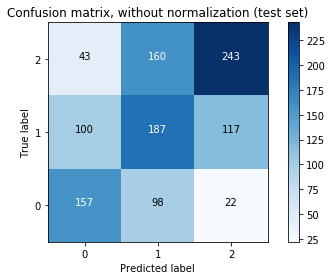

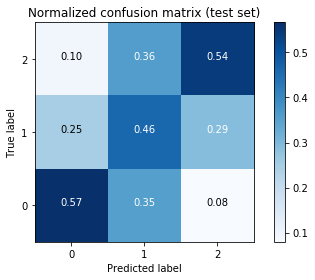

In [237]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap,aspect='equal')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylim(-0.5, 2.5)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


class_names = ['0','1','2']
# Compute confusion matrix
cnf_matrix = confusion_matrix(np.array(y_test), p_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization (test set)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix (test set)')

plt.show()

Confusion matrix, without normalization
[[ 672  291   70]
 [ 262  793  603]
 [  63  420 1332]]
Normalized confusion matrix
[[0.65 0.28 0.07]
 [0.16 0.48 0.36]
 [0.03 0.23 0.73]]


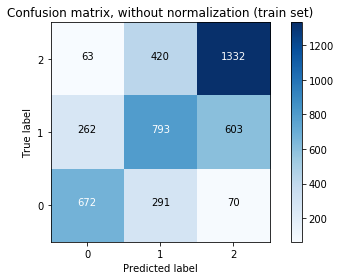

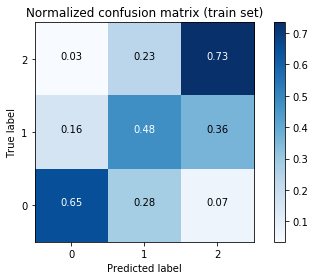

In [207]:
class_names = ['0','1','2']
# Compute confusion matrix
cnf_matrix = confusion_matrix(np.array(y_train), p_train)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization (train set)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix (train set)')

plt.show()

### Accuracy

In [208]:
 from sklearn.metrics import accuracy_score
print("Test_Accuracy:",accuracy_score(y_test, p_test))
print("Train_Accuracy:",accuracy_score(y_train, p_train))

Test_Accuracy: 0.6459627329192547
Train_Accuracy: 0.6207279183311141


<h1>Random Forest

<li> Random Forest model is used for comparison. We have defined 10 trees in our random forest and used entropy as the criterion. 

In [209]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


In [136]:
# This is a very important step in machine learning. It helps the algorithm quickly learn a better solution to the problem.

# We will use a standard scaler provided in the sklearn library. It subtracts the mean value of the observation and then divides it by the unit variance of the observation.
# We will perform the following steps:
    
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [210]:
# Fitting Random Forest Classification to the Training set
# n_estimators: This is the number of trees in the random forest classification. We have defined 10 trees in our random forest.
# criterion: This is the loss function used to measure the quality of the split. There are two available options in sklearn — gini and entropy. We have used entropy.
# random_state: This is the seed used by the random state generator for randomizing the dataset.
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [211]:
# Predicting the Test set results
p_test = classifier.predict(x_test)
p_train = classifier.predict(x_train)

In [212]:
y_test = np.array(y_test['gross_usa_adjusted_level'])

### complex matrix

Confusion matrix, without normalization
[[182  80  15]
 [ 71 220 113]
 [ 22 122 302]]
Normalized confusion matrix
[[0.66 0.29 0.05]
 [0.18 0.54 0.28]
 [0.05 0.27 0.68]]


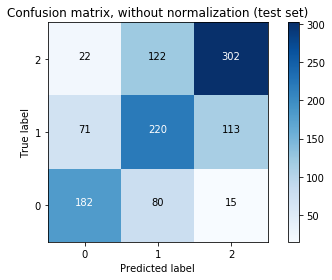

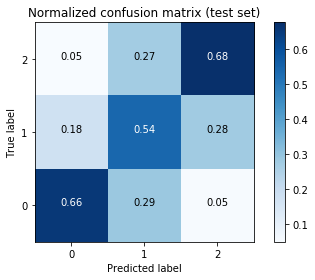

In [219]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, p_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization (test set)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix (test set)')

plt.show()

Confusion matrix, without normalization
[[1025    7    1]
 [  10 1640    8]
 [   3   12 1800]]
Normalized confusion matrix
[[9.92e-01 6.78e-03 9.68e-04]
 [6.03e-03 9.89e-01 4.83e-03]
 [1.65e-03 6.61e-03 9.92e-01]]


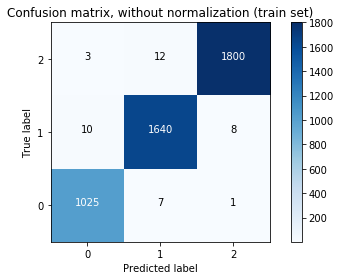

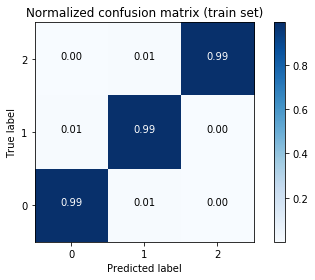

In [220]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, p_train)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization (train set)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix (train set)')

plt.show()

### accuracy

In [215]:
print("Test_Accuracy:",accuracy_score(y_test, p_test))
print("Train_Accuracy:",accuracy_score(y_train, p_train))

Test_Accuracy: 0.6246672582076309
Train_Accuracy: 0.9909010208610741


### F score

In [216]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test, target_names=class_names))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       277
           1       0.52      0.54      0.53       404
           2       0.70      0.68      0.69       446

    accuracy                           0.62      1127
   macro avg       0.63      0.63      0.63      1127
weighted avg       0.63      0.62      0.63      1127



### Feature Importance Analysis

In [222]:
model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.16, 0.05, 0.62, 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

Text(0.5, 0, 'Relative Importance')

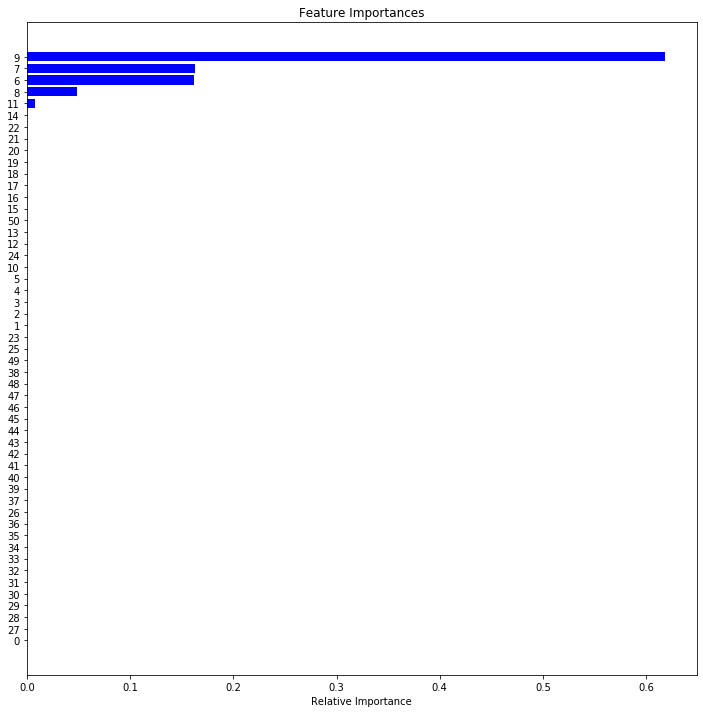

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),indices)
plt.xlabel('Relative Importance')

<h1>KNN classifier

<li>KNN model is used for comparison. The number of neighbors in our model is 7. 

In [225]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

In [226]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [227]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

In [228]:
#Train the model using the training sets
knn.fit(x_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [229]:
#Predict the response for test dataset
p_test = knn.predict(x_test)
p_train = knn.predict(x_train)

### complex matrix

Confusion matrix, without normalization
[[157  98  22]
 [100 187 117]
 [ 43 160 243]]
Normalized confusion matrix
[[0.57 0.35 0.08]
 [0.25 0.46 0.29]
 [0.1  0.36 0.54]]


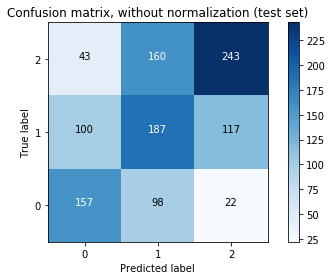

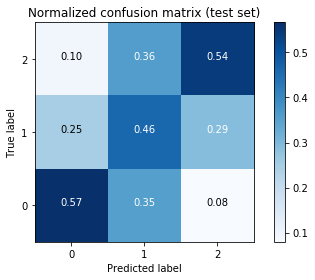

In [234]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, p_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization (test set)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix (test set)')

plt.show()

Confusion matrix, without normalization
[[ 716  240   77]
 [ 320 1038  300]
 [ 164  493 1158]]
Normalized confusion matrix
[[0.69 0.23 0.07]
 [0.19 0.63 0.18]
 [0.09 0.27 0.64]]


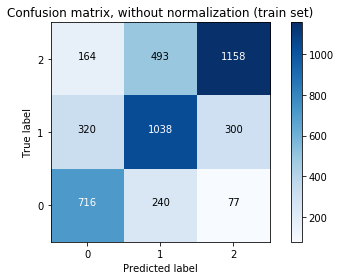

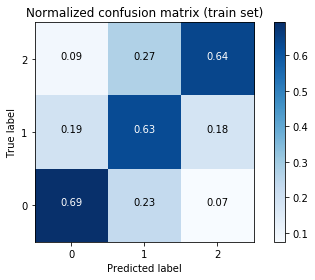

In [235]:

class_names = ['0','1','2']
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, p_train)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization (train set)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix (train set)')

plt.show()

### accuracy

In [236]:
print("Test_Accuracy:",accuracy_score(y_test, p_test))
print("Train_Accuracy:",accuracy_score(y_train, p_train))

Test_Accuracy: 0.520851818988465
Train_Accuracy: 0.6462494451841988


### F score

In [233]:
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test, target_names=class_names))

              precision    recall  f1-score   support

           0       0.52      0.57      0.54       277
           1       0.42      0.46      0.44       404
           2       0.64      0.54      0.59       446

    accuracy                           0.52      1127
   macro avg       0.53      0.52      0.52      1127
weighted avg       0.53      0.52      0.52      1127

